# Surbhi Mayank

## TASK 6 - Prediction using Decision Tree Algorithm

### AIM: Create the Decision Tree classifier and visualize it graphically.

In [19]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as sm
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# reading the data
df = pd.read_csv("Iris.csv",index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

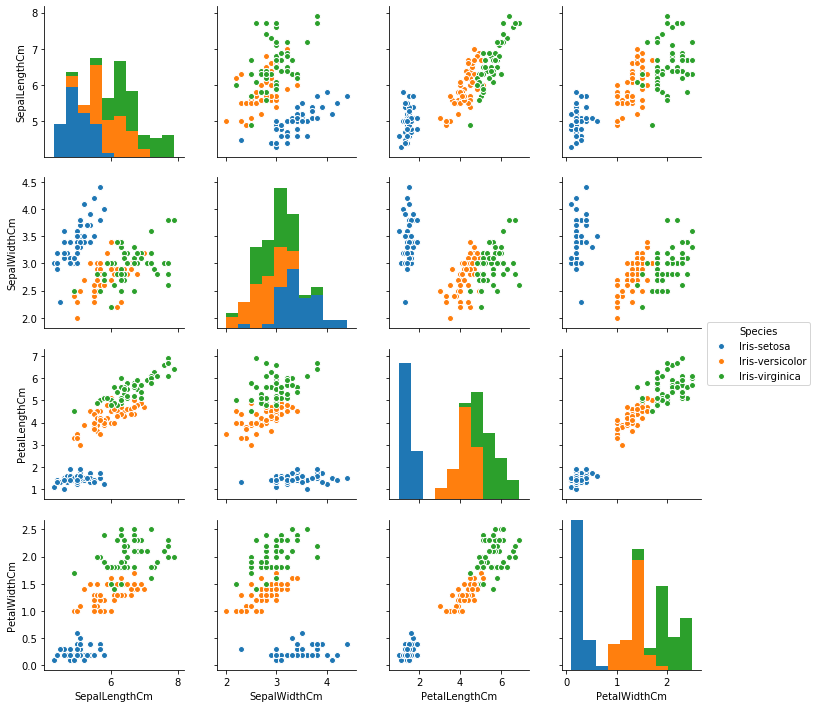

In [7]:
sns.pairplot(df, hue='Species')

We can observe that species "Iris Setosa" makes a distinctive cluster in every parameter, while other two species overlap a bit each other.

## Finding the correlation matrix

In [8]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


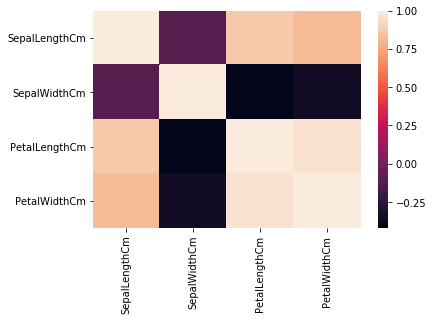

In [9]:
# Visualizing the data using heatmap
sns.heatmap(df.corr())

We observed that: 
- Petal length is highly related to petal width 
- Sepal length is not related to sepal width

## Data Preprocessing

In [12]:
target = df['Species']
df1 = df.copy()
df1 = df1.drop('Species',axis=1)
df1.shape

(150, 4)

In [13]:
# Defining the attributes and labels
X = df.iloc[:, [0,1,2,3]].values
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
y = df['Species'].values
df.shape

(150, 5)

## Training the model

In [14]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
len(X_train)

120

In [16]:
len(X_test)

30

## Building the model

In [17]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2, 5)}

In [20]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, verbose=1, n_jobs=-1)
tree.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.9s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
              

In [21]:
tree.best_score_

0.9499999999999998

In [22]:
tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
tree.best_params_

{'max_depth': 2, 'max_features': 3}

In [24]:
train_pred = tree.predict(X_train)

In [25]:
test_pred = tree.predict(X_test)

In [27]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



## Building the final decision tree

In [28]:
clf_tree = DecisionTreeClassifier(max_depth=4, max_features=2)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
tree_test_pred = pd.DataFrame({'actual': y_test,
                              'predicted': clf_tree.predict(X_test)})

In [30]:
tree_test_pred

,actual,predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,2
9,1,1


In [31]:
metrics.accuracy_score(tree_test_pred.actual, tree_test_pred.predicted)

0.9666666666666667

Text(33.0, 0.5, 'True label')

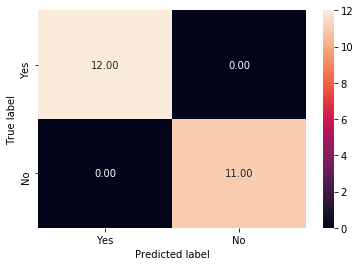

In [33]:
tree_cm = metrics.confusion_matrix(tree_test_pred.predicted,
                                  tree_test_pred.actual,
                                  [1,0])
sns.heatmap(tree_cm, annot=True,
           fmt='.2f',
           xticklabels=['Yes','No'], yticklabels=['Yes','No'])

plt.xlabel("Predicted label")
plt.ylabel("True label")

## Graphical Representation of Decision Tree

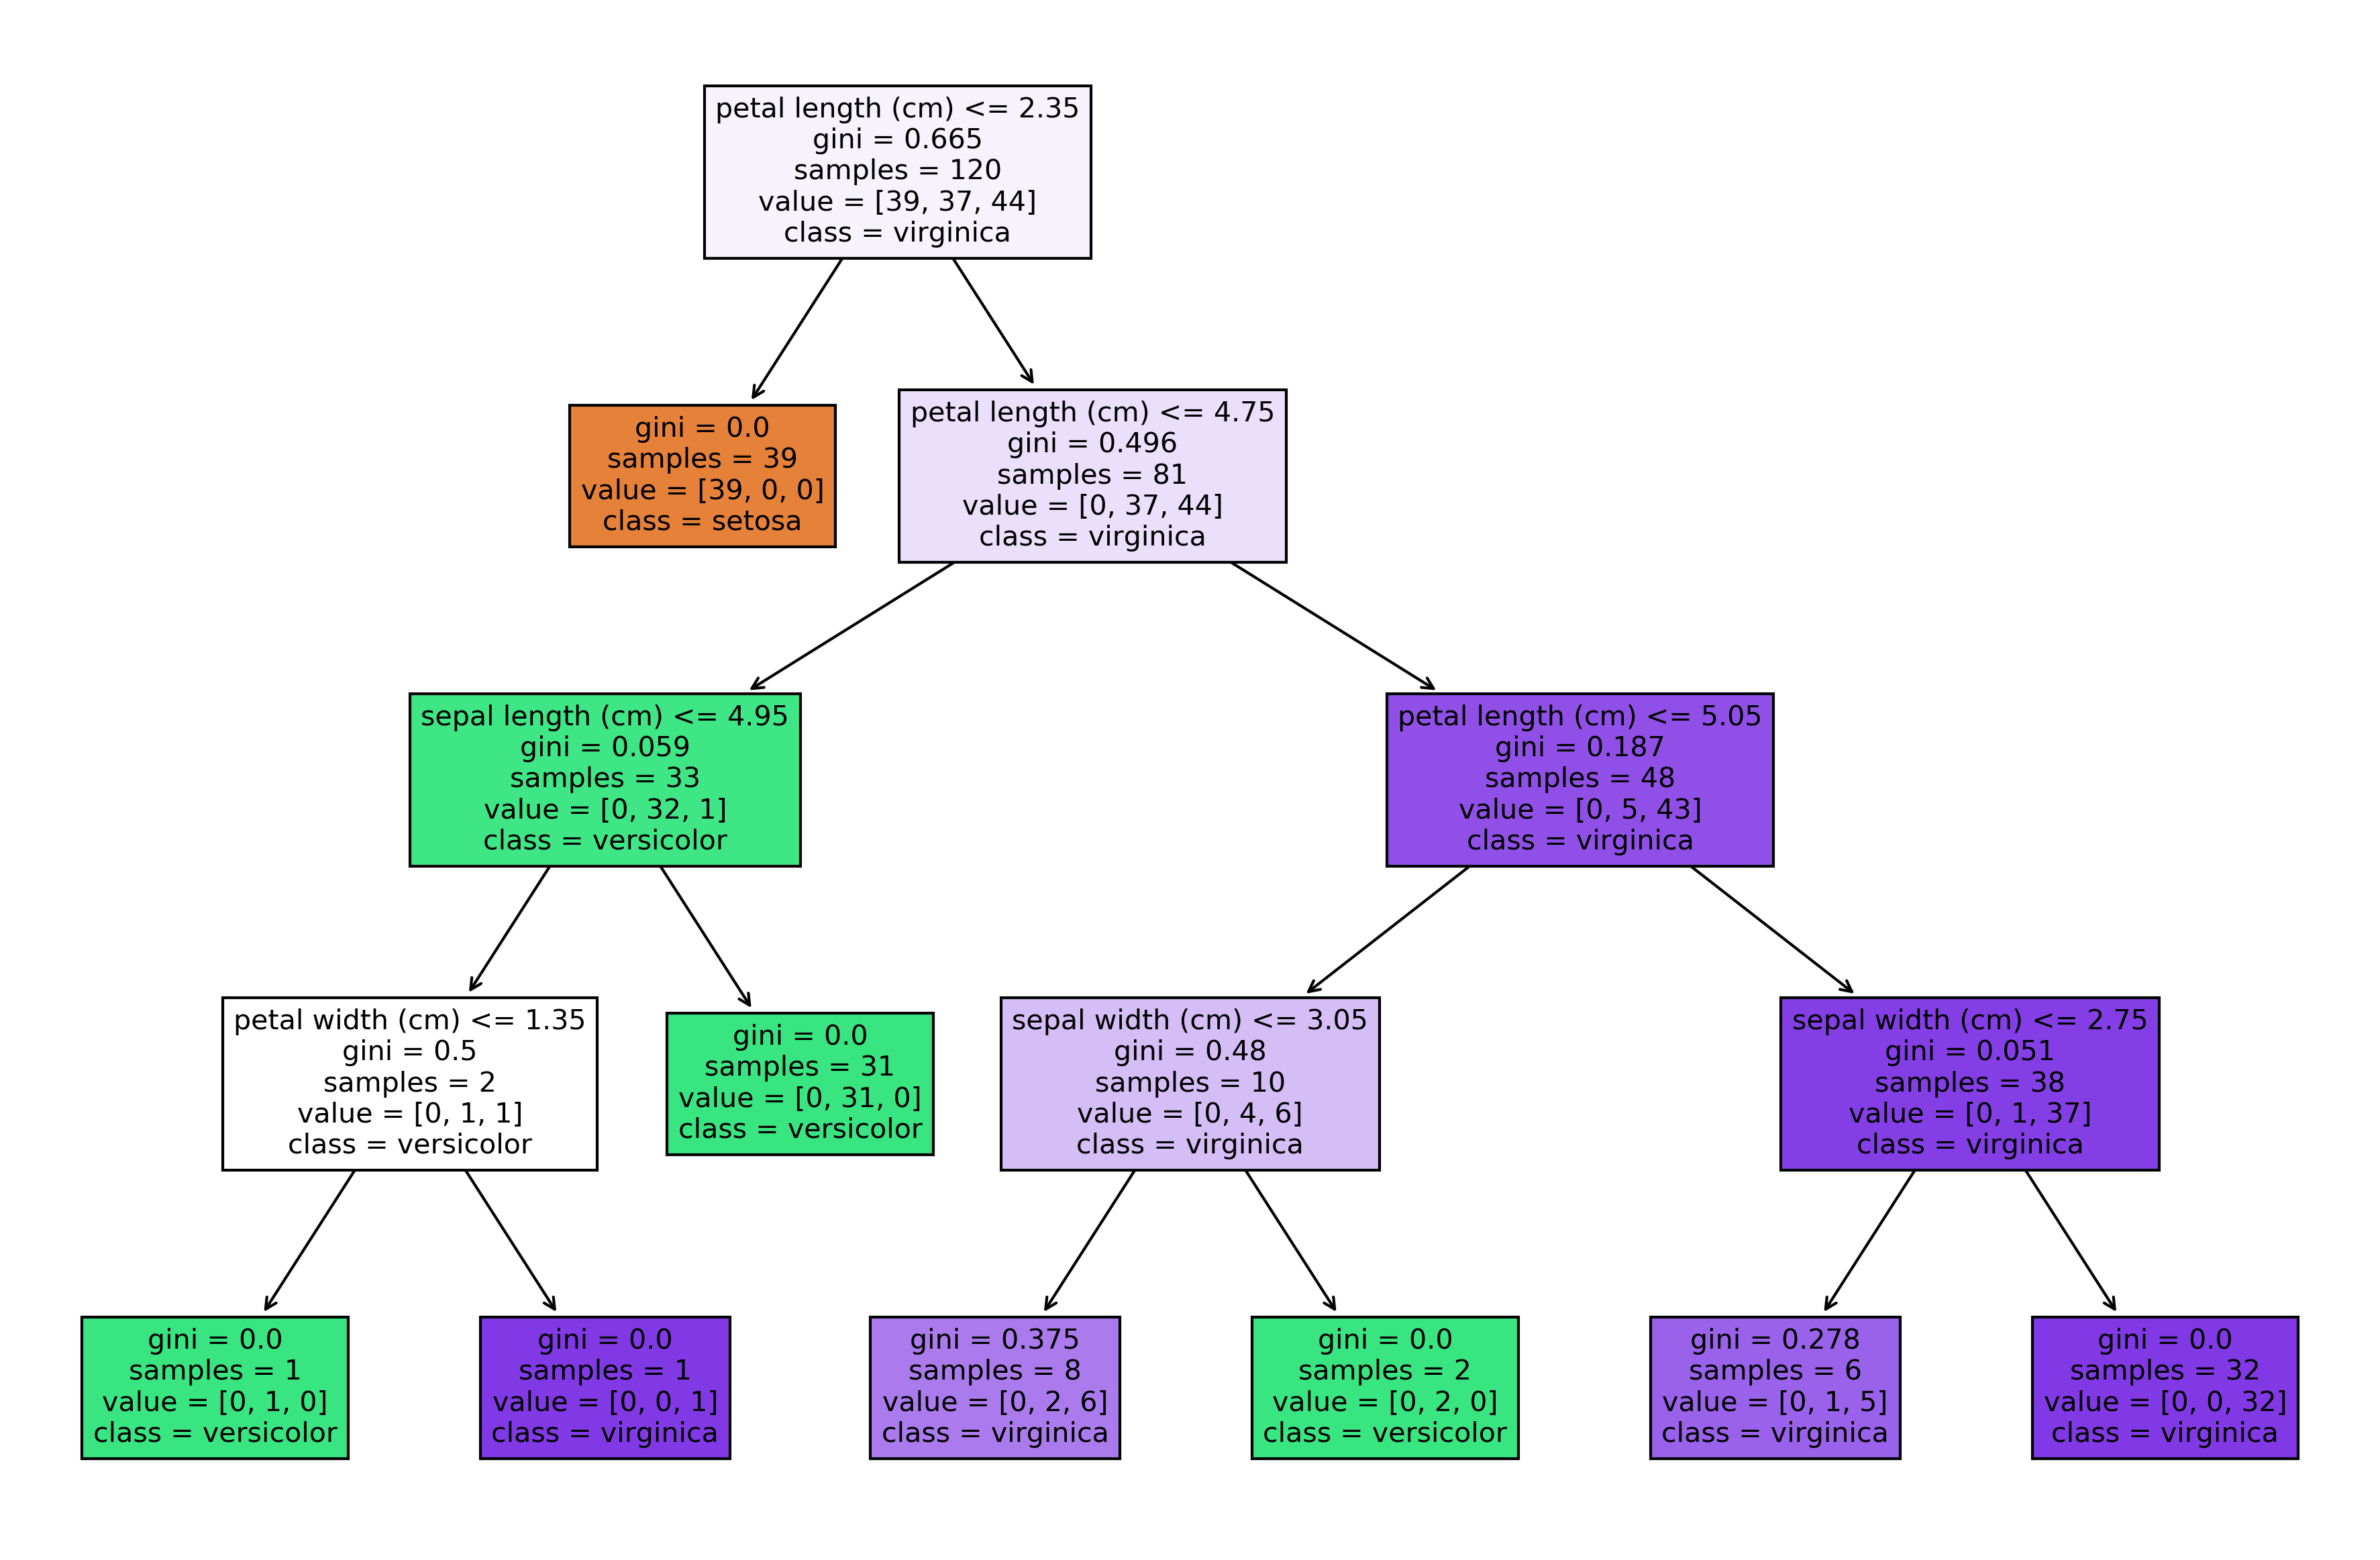

In [42]:
from sklearn import tree
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('graph.png')

The Descision Tree Classifier is created and is visaulized graphically. Also the prediction was calculated using decision tree algorithm and accuracy of the model was evaluated.